In [2]:
import os, sys
from scipy import stats
import numpy as np
import pandas as pd

from scipy import stats

sys.path.insert(1, '../libs/')
from stat_lib import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Medido a glicemina no lab e apresentando resultados

O que você faz no lab?

Primeiro, você convoca 30 pacientes.  
Explica o experimento que está fazendo e pede autorização (consentimento assistido).  
Em um determinado dia você recolhe amostras para exame de glicemia, pós-jejum.  
Depois, medica os pacientes.  
Passados 24 h você recolhe novas amostras, pós-jejum, e faz a comparação.

In [3]:
muC  = 140; sdvC  = 15
muH  = 110; sdvH  = 15
muHO = 130; sdvHO = 20
muM  = 105; sdvM  = 12
muMO = 120; sdvMO = 15
N   = 30

sampC  = np.random.normal(loc=muC,  scale=sdvC,  size=N)
sampH  = np.random.normal(loc=muH,  scale=sdvH,  size=N)
sampHO = np.random.normal(loc=muHO, scale=sdvHO, size=N)
sampM  = np.random.normal(loc=muM,  scale=sdvM,  size=N)
sampMO = np.random.normal(loc=muMO, scale=sdvMO, size=N)

mucC  = np.mean(sampC);  sdvcC  = np.std(sampC)
mucH  = np.mean(sampH);  sdvcH  = np.std(sampH)
mucHO = np.mean(sampHO); sdvcHO = np.std(sampHO)
mucM  = np.mean(sampM);  sdvcM  = np.std(sampM)
mucMO = np.mean(sampMO); sdvcMO = np.std(sampMO)

### O que vocẽ faz no lab? No Prisma ...

In [5]:
df = pd.DataFrame([sampC, sampH, sampHO, sampM, sampMO]).T
df.columns = ['control', 'masc', 'mascObeso', 'fem', 'femObeso']
df.head()

,control,masc,mascObeso,fem,femObeso
0,145.163985,89.895937,157.489683,98.896785,111.651331
1,151.105904,118.109033,126.618391,98.208665,113.207313
2,147.144394,119.497035,142.041717,98.102908,129.920881
3,147.612592,82.896431,118.090281,83.839713,103.083760
4,146.658696,108.362732,95.547882,86.191212,93.687392


In [6]:
dfs = pd.DataFrame([sampC, ['control']*N]).T
dfs.columns = ['val', '_class']

dfa = pd.DataFrame([sampH, ['masc']*N]).T
dfa.columns = ['val', '_class']
dfs = dfs.append(dfa)

dfa = pd.DataFrame([sampHO, ['mascObeso']*N]).T
dfa.columns = ['val', '_class']
dfs = dfs.append(dfa)

dfa = pd.DataFrame([sampM, ['fem']*N]).T
dfa.columns = ['val', '_class']
dfs = dfs.append(dfa)

dfa = pd.DataFrame([sampMO, ['femObesa']*N]).T
dfa.columns = ['val', '_class']
dfs = dfs.append(dfa)

dfs.shape, dfs['_class'].unique()                   

((150, 2),
 array(['control', 'masc', 'mascObeso', 'fem', 'femObesa'], dtype=object))

### Barplot com Seaborn

https://seaborn.pydata.org/generated/seaborn.barplot.html

Text(0.5, 0, '')

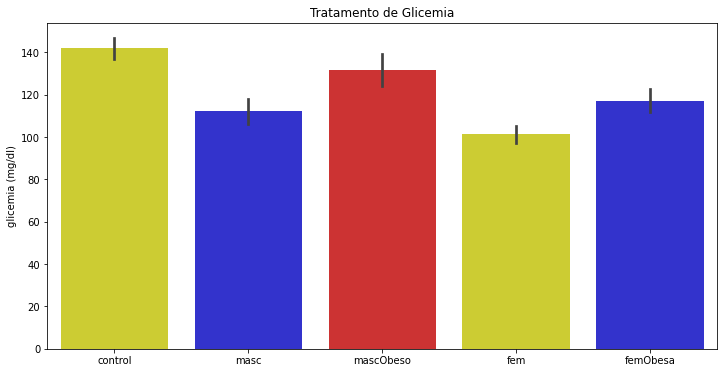

In [7]:
plt.figure(figsize=(12,6))

colors = ['yellow', 'blue', 'red']
ci = 95

ax = sns.barplot(x="_class", y="val", data=dfs, saturation=0.6, palette=colors, ci=ci)
plt.title("Tratamento de Glicemia")
plt.ylabel('glicemia (mg/dl)')
plt.xlabel('')

In [9]:
retH, textH, text_statH, statH, pvalueH = ttest(sampC, sampH, equal_var=False)
textH, text_statH

('As distribuições não são similares (rejeita-se a H0)',
 'p-value 1.53e-10 (***)')

In [8]:
retHHO, textHHO, text_statHHO, statHHO, pvalueHHO = ttest(sampH, sampHO, equal_var=False)
textHHO, text_statHHO

('As distribuições não são similares (rejeita-se a H0)',
 'p-value 3.41e-04 (***)')

In [10]:
retM, textM, text_statM, statM, pvalueM = ttest(sampC, sampM, equal_var=False)
textM, text_statM

('As distribuições não são similares (rejeita-se a H0)',
 'p-value 6.37e-18 (***)')

In [12]:
retMMO, textMMO, text_statMMO, statMMO, pvalueMMO = ttest(sampM, sampMO, equal_var=False)
textMMO, text_statMMO

('As distribuições não são similares (rejeita-se a H0)',
 'p-value 6.65e-05 (***)')

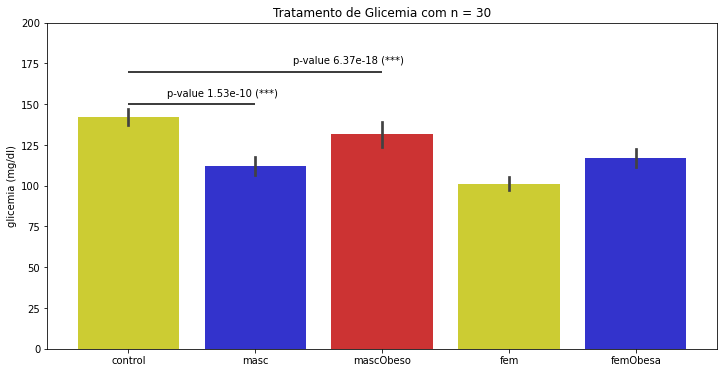

In [13]:
plt.figure(figsize=(12,6))

colors = ['yellow', 'blue', 'red']
ci = 95

ax = sns.barplot(x="_class", y="val", data=dfs, saturation=0.6, palette=colors, ci=ci)
plt.title("Tratamento de Glicemia com n = %d"%(N))
plt.ylabel('glicemia (mg/dl)')
plt.xlabel('')

y1 = 150; del_y1 = 5; xmin=0; xmax=1
plt.hlines(y=y1, xmin=xmin, xmax=xmax, colors='black')
plt.text(x=.3, y=y1+del_y1, s=text_statH)

y2 = 170; del_y2 = 5; xmin=1; xmax=2
plt.hlines(y=y2, xmin=0, xmax=xmax, colors='black')
plt.text(x=1+.3, y=y2+del_y2, s=text_statM)

plt.ylim(0, 200);

### Exercício
  - Terminar as outras barras de significância

### As distribuiões são nomais? teste de Shaprio-Wilkis

In [14]:
retNormC, textNormC, text_statNormC, statNormC, pvalueNormC = test_normality_desc(sampC, 0.05)
textNormC, text_statNormC

('A distribuição se assemelha a uma distriuição normal (não se rejeita a H0)',
 'p-value 9.48e-02 (NS)')

In [15]:
retNormH, textNormH, text_statNormH, statNormH, pvalueNormH = test_normality_desc(sampH, 0.05)
textNormH, text_statNormH

('A distribuição se assemelha a uma distriuição normal (não se rejeita a H0)',
 'p-value 1.53e-01 (NS)')

In [16]:
retNormM, textNormM, text_statNormM, statNormM, pvalueNormM = test_normality_desc(sampM, 0.05)
textNormM, text_statNormM

('A distribuição se assemelha a uma distriuição normal (não se rejeita a H0)',
 'p-value 5.34e-01 (NS)')

### Exercício
  - Fazer para os obesos

### ANOVA - análise de variância (Ronald Fisher)

In [17]:
stats.f_oneway(sampC, sampH, sampM)

F_onewayResult(statistic=69.62442758565842, pvalue=8.801962406789696e-19)

In [18]:
ret, text, text_stat, stat, pvalue = test_one_way_ANOVA3(sampC, sampH, sampM, alpha = 0.05)
text, text_stat

('As distribuições não têm variâncias similares (rejeita-se a H0)',
 'p-value 8.80e-19 (***)')

### Exercícios
  - Fazer ANOVA para as 5 distribuições

### Mas quem é diferente???

### Há diferenças entre as distribuições
  - Estamos comparando mais de 2 distribuições
  - As distribuições são normais
  - ANOVA
  

In [ ]:
### exercício anterior



### Problema da ANOVA
  - diz se há ao menos uma distribuição diferente
  - mas não diz qual nem quanto (pvalue para cada comparação)

### Comparando-se todas as distribuições x todas
  - Teste de Tukey
  
https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html  
 https://www.statsmodels.org/stable/generated/statsmodels.sandbox.stats.multicomp.TukeyHSDResults.html#statsmodels.sandbox.stats.multicomp.TukeyHSDResults  


In [21]:
from statsmodels.stats.multicomp import MultiComparison  # Tukey

df.head(3)

,control,masc,mascObeso,fem,femObeso
0,145.163985,89.895937,157.489683,98.896785,111.651331
1,151.105904,118.109033,126.618391,98.208665,113.207313
2,147.144394,119.497035,142.041717,98.102908,129.920881


In [24]:
groups = list(df.columns)
groups

['control', 'masc', 'mascObeso', 'fem', 'femObeso']

In [28]:
cardata = MultiComparison(dfs, groups)
results = cardata.tukeyhsd()
results_summary_to_dataframe(results)

/media/flalix/5c1ba0b4-f897-451c-9068-ac5e57194590/flalix/anaconda3/envs/py_env37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/media/flalix/5c1ba0b4-f897-451c-9068-ac5e57194590/flalix/anaconda3/envs/py_env37/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: v must be > 1 when p >= .9